### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### read the data from source

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
print(df.head())

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [4]:
print(df.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


In [5]:
print(df.describe())

       YearsExperience         Salary
count        33.000000      33.000000
mean          5.921212   82760.303030
std           3.342413   34014.620992
min           1.100000   37731.000000
25%           3.200000   56957.000000
50%           5.100000   67938.000000
75%           8.700000  109431.000000
max          13.000000  156000.000000


In [6]:
# check if salary and experience are related
# get the correlation coeffiecient from [0, 1] or [1, 0] position
corr = np.corrcoef(df['Salary'], df['YearsExperience'])
print(corr[0, 1])

0.9836422753186338


### exploratory data analysis

Text(0.5, 1.0, 'Experience vs Salary')

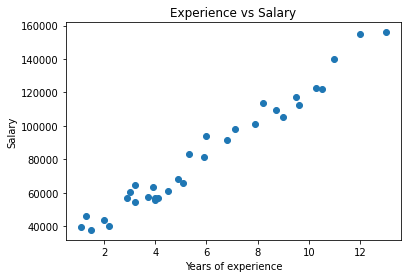

In [7]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')

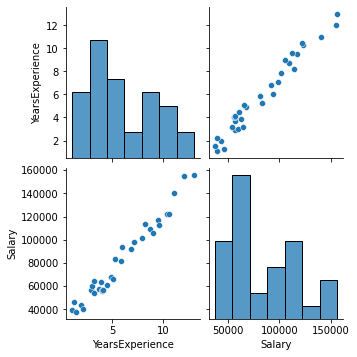

In [8]:
sns.pairplot(df)

### data cleansing operations

#### check for NaN

In [9]:
# there is no missing value in either of the columns
print(df.isna().sum())

YearsExperience    0
Salary             0
dtype: int64


#### check for wrong data type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  33 non-null     float64
 1   Salary           33 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 656.0 bytes


### decide the input and output features

In [11]:
# since salary is the dependent variable, removing it from
# data source will give us a data set left only with 
# set of indpendent variables
# note: x must be a two dimensional array
# - there can be one more more independent variable(s)
x = df.drop('Salary', axis=1)
print(f"x dim = {x.ndim}, shape = {x.shape}")

# dependent variable
# - thre must be one and only dependent variable
y = df['Salary']
print(f"y dim = {y.ndim}, shape = {y.shape}")

x dim = 2, shape = (33, 1)
y dim = 1, shape = (33,)


### split the data

In [12]:
from sklearn.model_selection import train_test_split

# get 20% of the whole data into a testing set
# get 80% of the whole data into a training set
# train_test_split(x, y, test_size=0.2)

# get 80% of the whole data into a training set
# get 20% of the whole data into a testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=12345)

print(f"size of whole data: {len(df['Salary'])}, size of train data = {len(y_train)}, size of test data = {len(y_test)}")

size of whole data: 33, size of train data = 26, size of test data = 7


### prepare a model

In [13]:
from sklearn.linear_model import LinearRegression

# create a model
model = LinearRegression()

# fit the training data into the model
# asking model to find the insights/patterns of the data
model.fit(x_train, y_train)

LinearRegression()

### evaluate the model

In [14]:
print(f"score of the model: {model.score}")

score of the model: <bound method RegressorMixin.score of LinearRegression()>


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# predict the salaries of the test data
y_predictions = model.predict(x_test)
# print(y_predictions)
# print(x_test)
# print(y_test)

MAE = mean_absolute_error(y_test, y_predictions)
print(f"MAE = {MAE}")

MSE = mean_squared_error(y_test, y_predictions)
print(f"MSE = {MSE}")

RMSE = np.sqrt(MSE)
print(f"RMSE = {RMSE}")

MAE = 4207.941326121618
MSE = 26018867.269139417
RMSE = 5100.869266030979


### fine tune the model

In [17]:
print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


### use the model to predict the unseen data

In [18]:
# find the salary of a person having 14 years of experience 
salaries = model.predict([[14]])
print(f"salary of a person having 14 years of experience = {salaries[0]}")

salary of a person having 14 years of experience = 162857.36151968787


In [19]:
# find the salary of a person having 15 years of experience 
salaries = model.predict([[15]])
print(f"salary of a person having 15 years of experience = {salaries[0]}")

salary of a person having 15 years of experience = 172818.44810959423


In [20]:
# find the salary of a person having 14 years of experience 
salaries = model.predict([[13]])
print(f"salary of a person having 13 years of experience = {salaries[0]}")

salary of a person having 13 years of experience = 152896.27492978153
